### 1. Carrega o arquivo com as sentenças, features e classificação

In [2]:
import pandas as pd

data_frame = pd.read_csv('dataset_full.csv')

data_frame = data_frame.drop(columns=["index", "entidades_nomeadas", "adjetivos", "triggers", "intensifiers", "modifiers", "quotation_marks", "repeated_punctuation", "letters_repetition", "word_repetition"])

In [3]:
data_frame.head()

,sentenca_original,sentenca_processada1,classificacao,sentenca_processada2
0,"A Folha, sempre [tão solícita]P6, só fez junta...","A Folha, sempre tão solícita, só fez juntar os...",1,A Folha sempre tão solícita só fez juntar os d...
1,o mensalão não termina no petrolão...,o mensalão não termina no petrolão...,1,o mensalão não termina no petrolão
2,Para a tristeza da extrema-direita e da extrem...,Para a tristeza da extrema-direita e da extrem...,1,Para a tristeza da extremadireita e da extrema...
3,"Enquanto Temer tenta se safar, Cunha dará anda...","Enquanto Temer tenta se safar, Cunha dará anda...",1,Enquanto Temer tenta se safar Cunha dará andam...
4,Que dupla...,Que dupla...,1,Que dupla


In [4]:
print(data_frame['classificacao'].value_counts())

1    2000
0    2000
Name: classificacao, dtype: int64


### 2. Cria função para exibição da WordCloud

In [5]:
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_word_cloud(classificacao, sentenca):
    
    corpus = data_frame.query(f'classificacao == {classificacao}')
        
    todas_palavras = ' '.join([texto for texto in data_frame[sentenca]])

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')

    plt.show()

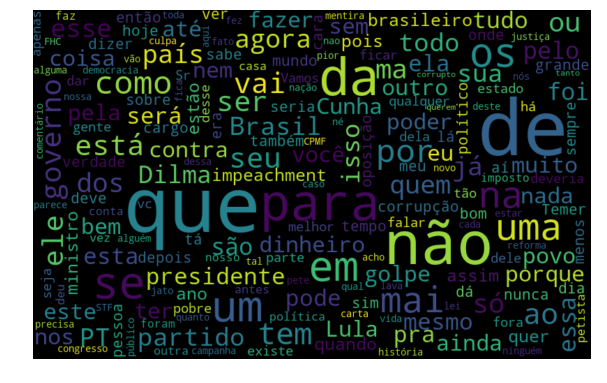

In [8]:
show_word_cloud(1, 'sentenca_processada2')

### 3. Realiza o pré-processamento das sentenças

<span style="color:red">ATENÇÃO: A sentença 2 já foi processada, removendo-se todos as pontuações (, ; ! ? ...)</span>

#### 3.1. Remove os acentos de todas as palavras

In [9]:
import unidecode

# percorre as sentenças do córpus e remove os acentos das palavras:
sentenca_processada = list()

for sentenca in data_frame['sentenca_processada2']:
    sentenca_sem_acentos = unidecode.unidecode(sentenca)    
    sentenca_processada.append(sentenca_sem_acentos)
    
# ou, poderia ser apenas:
# sentenca_processada = [unidecode.unidecode(texto) for texto in data_frame['sentenca_processada2']]
    
# cria uma nova coluna no córpus com estas sentenças processadas:
data_frame['sentenca_processada3_1'] = sentenca_processada

In [10]:
print(data_frame['sentenca_processada2'][0], end='\n\n')
print(data_frame['sentenca_processada3_1'][0])

A Folha sempre tão solícita só fez juntar os dois desafetos da presidenta sic no mesmo saco para que seus leitores possam identificar direitinho quem são os vilões

A Folha sempre tao solicita so fez juntar os dois desafetos da presidenta sic no mesmo saco para que seus leitores possam identificar direitinho quem sao os viloes


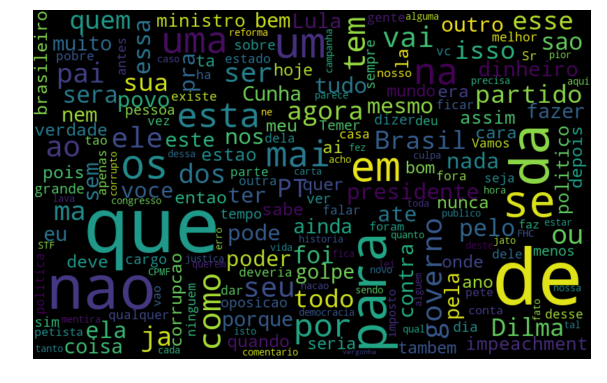

In [11]:
show_word_cloud(1, 'sentenca_processada3_1')

#### 3.2. Remove as Stop Words

In [12]:
from nltk.corpus import stopwords
from nltk import tokenize
import unidecode

palavras_irrelevantes = stopwords.words('portuguese')
palavras_irrelevantes_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

# percorre as sentenças do córpus e remove as palavras irrelevantes:
sentenca_processada = list()

for sentenca in data_frame['sentenca_processada3_1']:
    
    # cria uma lista para adicionar cada token da sentença, sem as stop words:
    nova_sentenca = list()
    
    # cria uma variável com os otkens da sentenças (separadas pelo espaço (WhitespaceTokenizer)):
    palavras_sentenca = tokenize.WhitespaceTokenizer().tokenize(sentenca)
    
    for palavra in palavras_sentenca:
        if palavra not in palavras_irrelevantes_sem_acento:
            nova_sentenca.append(palavra)
            
    # adiciona na lista de sentenças processadas a sentenca atual sem as stop words (join de strings)
    sentenca_processada.append(' '.join(nova_sentenca))
    
# cria uma nova coluna no córpus com estas sentenças processadas:
data_frame['sentenca_processada3_2'] = sentenca_processada

In [27]:
print(data_frame['sentenca_processada2'][0], end='\n\n')
print(data_frame['sentenca_processada3_1'][0], end='\n\n')
print(data_frame['sentenca_processada3_2'][0])

A Folha sempre tão solícita só fez juntar os dois desafetos da presidenta sic no mesmo saco para que seus leitores possam identificar direitinho quem são os vilões

A Folha sempre tao solicita so fez juntar os dois desafetos da presidenta sic no mesmo saco para que seus leitores possam identificar direitinho quem sao os viloes

A Folha sempre tao solicita fez juntar dois desafetos presidenta sic saco leitores possam identificar direitinho viloes


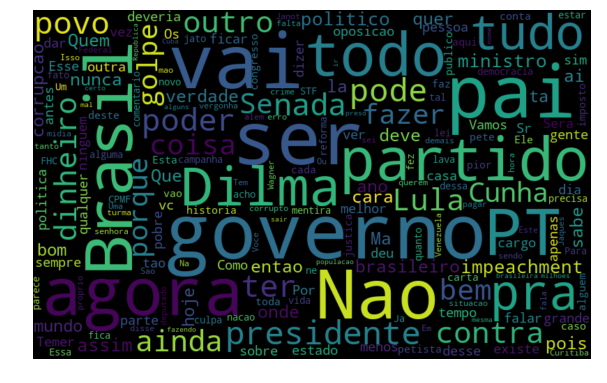

In [14]:
show_word_cloud(1, 'sentenca_processada3_2')

#### 3.3. Altera as palavras para letras minúsculas

In [15]:
sentenca_processada = [texto.lower() for texto in data_frame['sentenca_processada3_2']]
    
data_frame['sentenca_processada3_3'] = sentenca_processada

In [16]:
print(data_frame['sentenca_processada2'][0], end='\n\n')
print(data_frame['sentenca_processada3_1'][0], end='\n\n')
print(data_frame['sentenca_processada3_2'][0], end='\n\n')
print(data_frame['sentenca_processada3_3'][0])

A Folha sempre tão solícita só fez juntar os dois desafetos da presidenta sic no mesmo saco para que seus leitores possam identificar direitinho quem são os vilões

A Folha sempre tao solicita so fez juntar os dois desafetos da presidenta sic no mesmo saco para que seus leitores possam identificar direitinho quem sao os viloes

A Folha sempre tao solicita fez juntar dois desafetos presidenta sic saco leitores possam identificar direitinho viloes

a folha sempre tao solicita fez juntar dois desafetos presidenta sic saco leitores possam identificar direitinho viloes


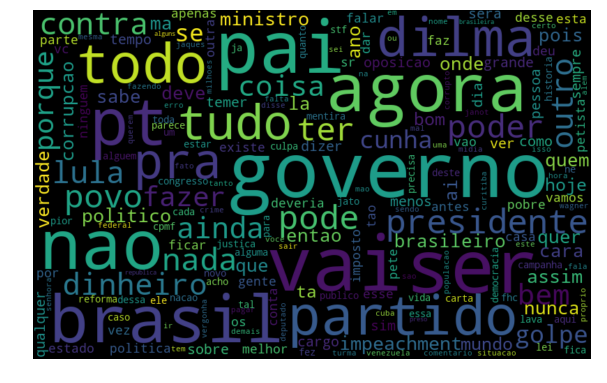

In [17]:
show_word_cloud(1, 'sentenca_processada3_3')

#### 3.4. Mantém apenas as raizes das palavras
Neste caso, utilizamos o Stemming, no qual mantém apenas as raizes das palavras.

Dadas as palavras "democracy", "democratic", "democratization"
Stemming transforma em "democr"
Lemmatization transforma em "democracy"

Dada a palavra "saw"
Stemming transforma em "s"
Lemmatization transforma em "see" ou "saw" (dependendo do contexto).

In [18]:
import nltk

stemmer = nltk.stem.RSLPStemmer()

sentenca_processada = list()
for sentenca in data_frame['sentenca_processada3_3']:
    
    nova_sentenca = list()
    palavra_sentenca = tokenize.WhitespaceTokenizer().tokenize(sentenca)
    
    for palavra in palavra_sentenca:
        nova_sentenca.append(stemmer.stem(palavra))
        
    sentenca_processada.append(' '.join(nova_sentenca))
    
data_frame['sentenca_processada3_4'] = sentenca_processada

In [19]:
print(data_frame['sentenca_processada2'][0], end='\n\n')
print(data_frame['sentenca_processada3_1'][0], end='\n\n')
print(data_frame['sentenca_processada3_2'][0], end='\n\n')
print(data_frame['sentenca_processada3_3'][0], end='\n\n')
print(data_frame['sentenca_processada3_4'][0])

A Folha sempre tão solícita só fez juntar os dois desafetos da presidenta sic no mesmo saco para que seus leitores possam identificar direitinho quem são os vilões

A Folha sempre tao solicita so fez juntar os dois desafetos da presidenta sic no mesmo saco para que seus leitores possam identificar direitinho quem sao os viloes

A Folha sempre tao solicita fez juntar dois desafetos presidenta sic saco leitores possam identificar direitinho viloes

a folha sempre tao solicita fez juntar dois desafetos presidenta sic saco leitores possam identificar direitinho viloes

a folh sempr tao solicit fez junt doi desafet president sic sac leit poss identific direit vilo


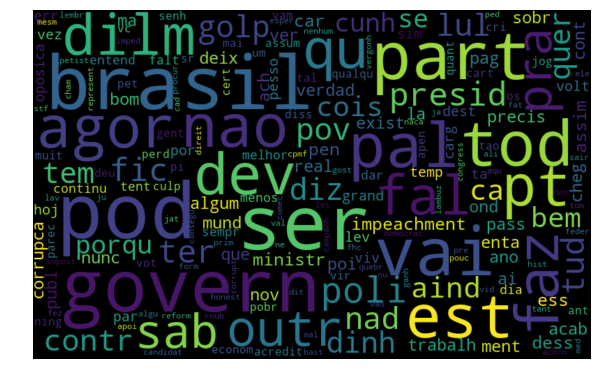

In [20]:
show_word_cloud(1, 'sentenca_processada3_4')

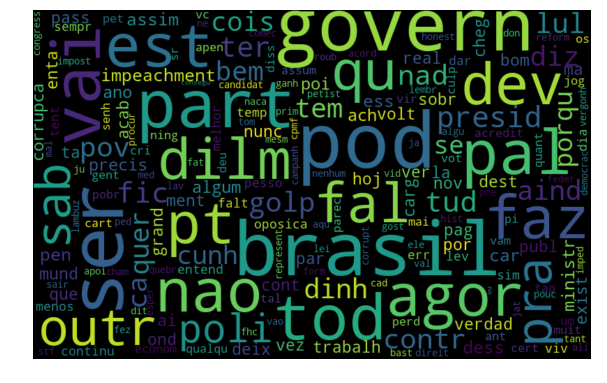

In [22]:
show_word_cloud(0, 'sentenca_processada3_4')

In [23]:
data_frame.head(1)

,sentenca_original,sentenca_processada1,classificacao,sentenca_processada2,sentenca_processada3_1,sentenca_processada3_2,sentenca_processada3_3,sentenca_processada3_4
0,"A Folha, sempre [tão solícita]P6, só fez junta...","A Folha, sempre tão solícita, só fez juntar os...",1,A Folha sempre tão solícita só fez juntar os d...,A Folha sempre tao solicita so fez juntar os d...,A Folha sempre tao solicita fez juntar dois de...,a folha sempre tao solicita fez juntar dois de...,a folh sempr tao solicit fez junt doi desafet ...


### 4. Salva o arquivo apenas com as sentenças pré-processadas e a classificação

In [26]:
# Salva o dataframe completo (sentenças pre-processadas + classificação)
# data_frame.to_csv('dataset_sentencas_processadas.csv', index=False)

# remove as colunas das sentenças, permanecendo apenas a classificação e features:
# data_frame_new = data_frame.drop(columns=["index"])

# Salva o dataframe features (classificação + features)
data_frame.to_csv('dataset_sentencas_processadas.csv', index=False)